#   Question 2 

#   Decision Tree Classifier for Fraud data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
fraud_data = pd.read_csv("Fraud_check.csv")
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


###  Preprocessing the dataset

In [4]:
fraud_data["Taxable.Income"] = pd.cut(fraud_data["Taxable.Income"], bins=(0,30000,100000), labels=["Risky","Good"])

In [5]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [6]:
label_encoder = preprocessing.LabelEncoder()
fraud_data["Undergrad"] = label_encoder.fit_transform(fraud_data["Undergrad"])
fraud_data["Marital.Status"] = label_encoder.fit_transform(fraud_data["Marital.Status"])
fraud_data["Taxable.Income"] = label_encoder.fit_transform(fraud_data["Taxable.Income"])
fraud_data["Urban"] = label_encoder.fit_transform(fraud_data["Urban"])

In [7]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


###  Splitting the dataset

In [8]:
x = fraud_data.drop(["Taxable.Income"], axis=1)
y = fraud_data.iloc[:,2]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

###  Standardizing the dataset

In [10]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

###  Building Decisin Tree Classifier Using Entropy

####  Max_Depth = None

In [11]:
model_1 = DecisionTreeClassifier(criterion= 'entropy')
model_1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

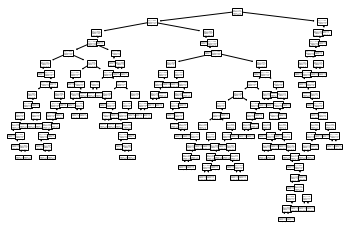

In [12]:
tree.plot_tree(model_1);

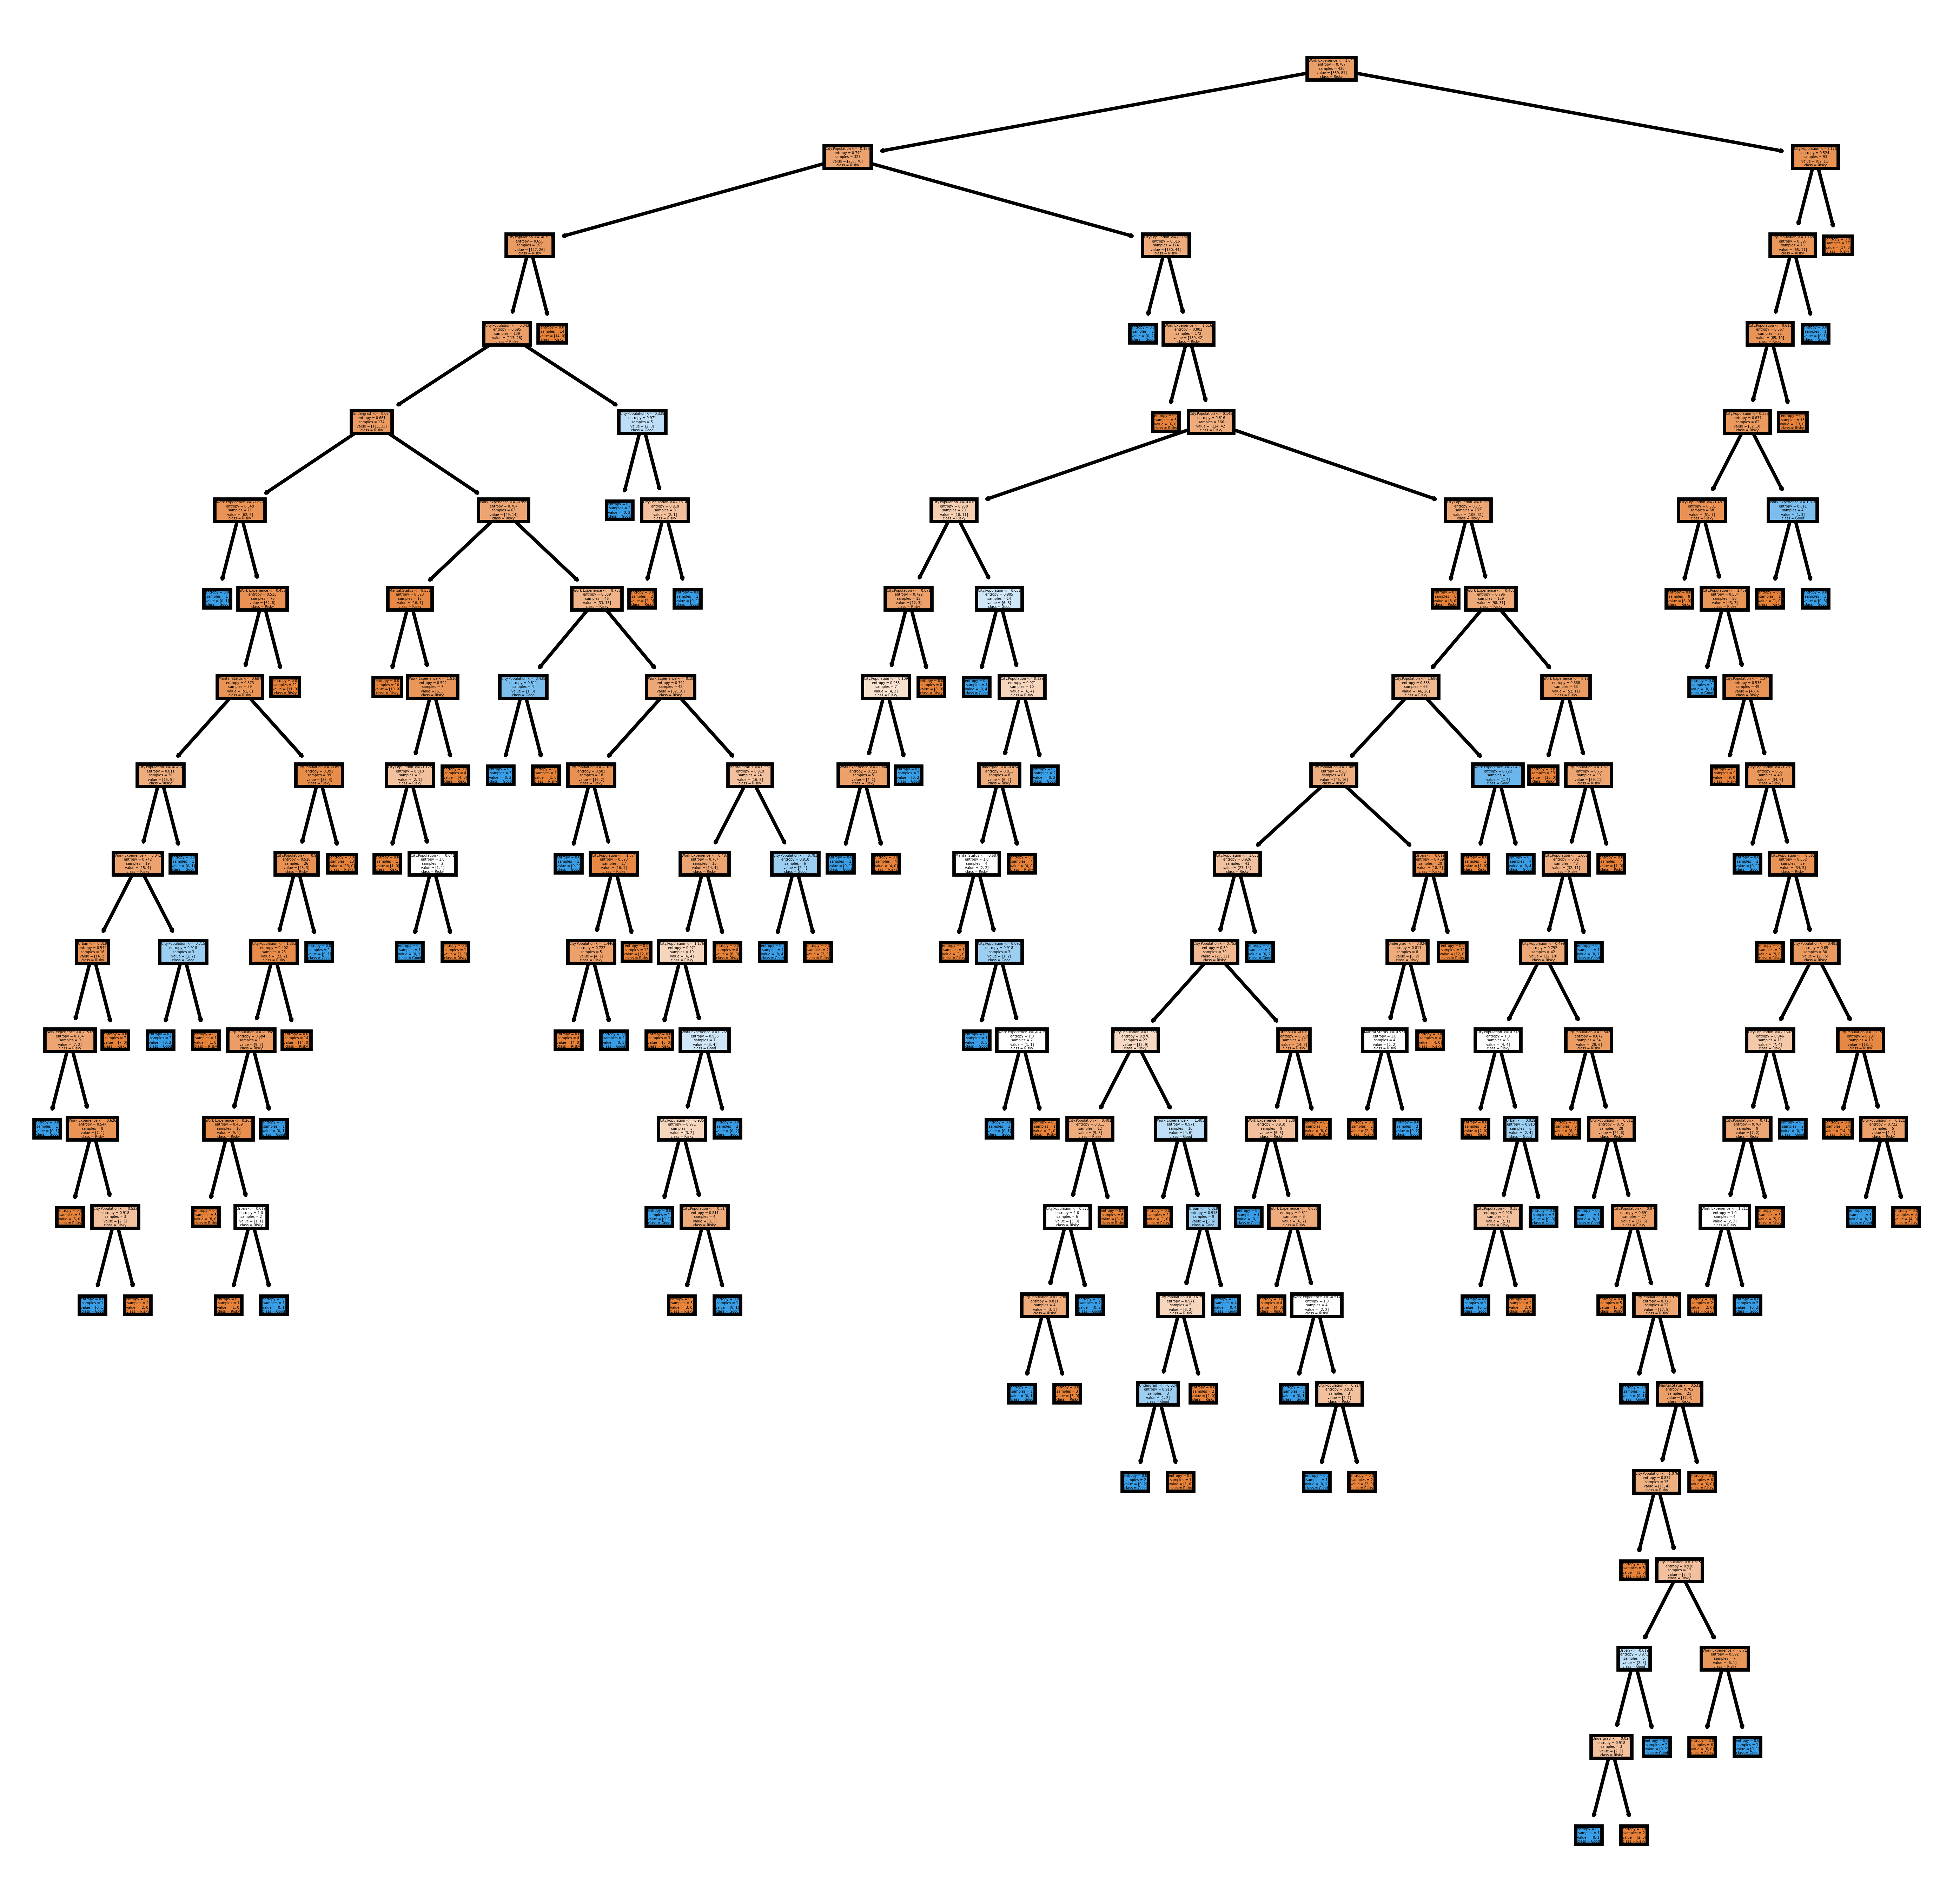

In [13]:
fn=['Undergrad ','Marital.Status','City.Population','Work Experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=700)
tree.plot_tree(model_1,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [14]:
pred_1 = model_1.predict(x_test)
pred_1

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [16]:
pd.Series(pred_1).value_counts()

0    154
1     26
dtype: int64

In [17]:
print('Model Accuracy is:',np.mean(pred_1==y_test))

Model Accuracy is: 0.6944444444444444


###  Max_Depth = 3

In [18]:
model_2 = DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

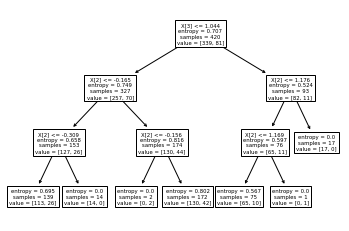

In [19]:
tree.plot_tree(model_2);

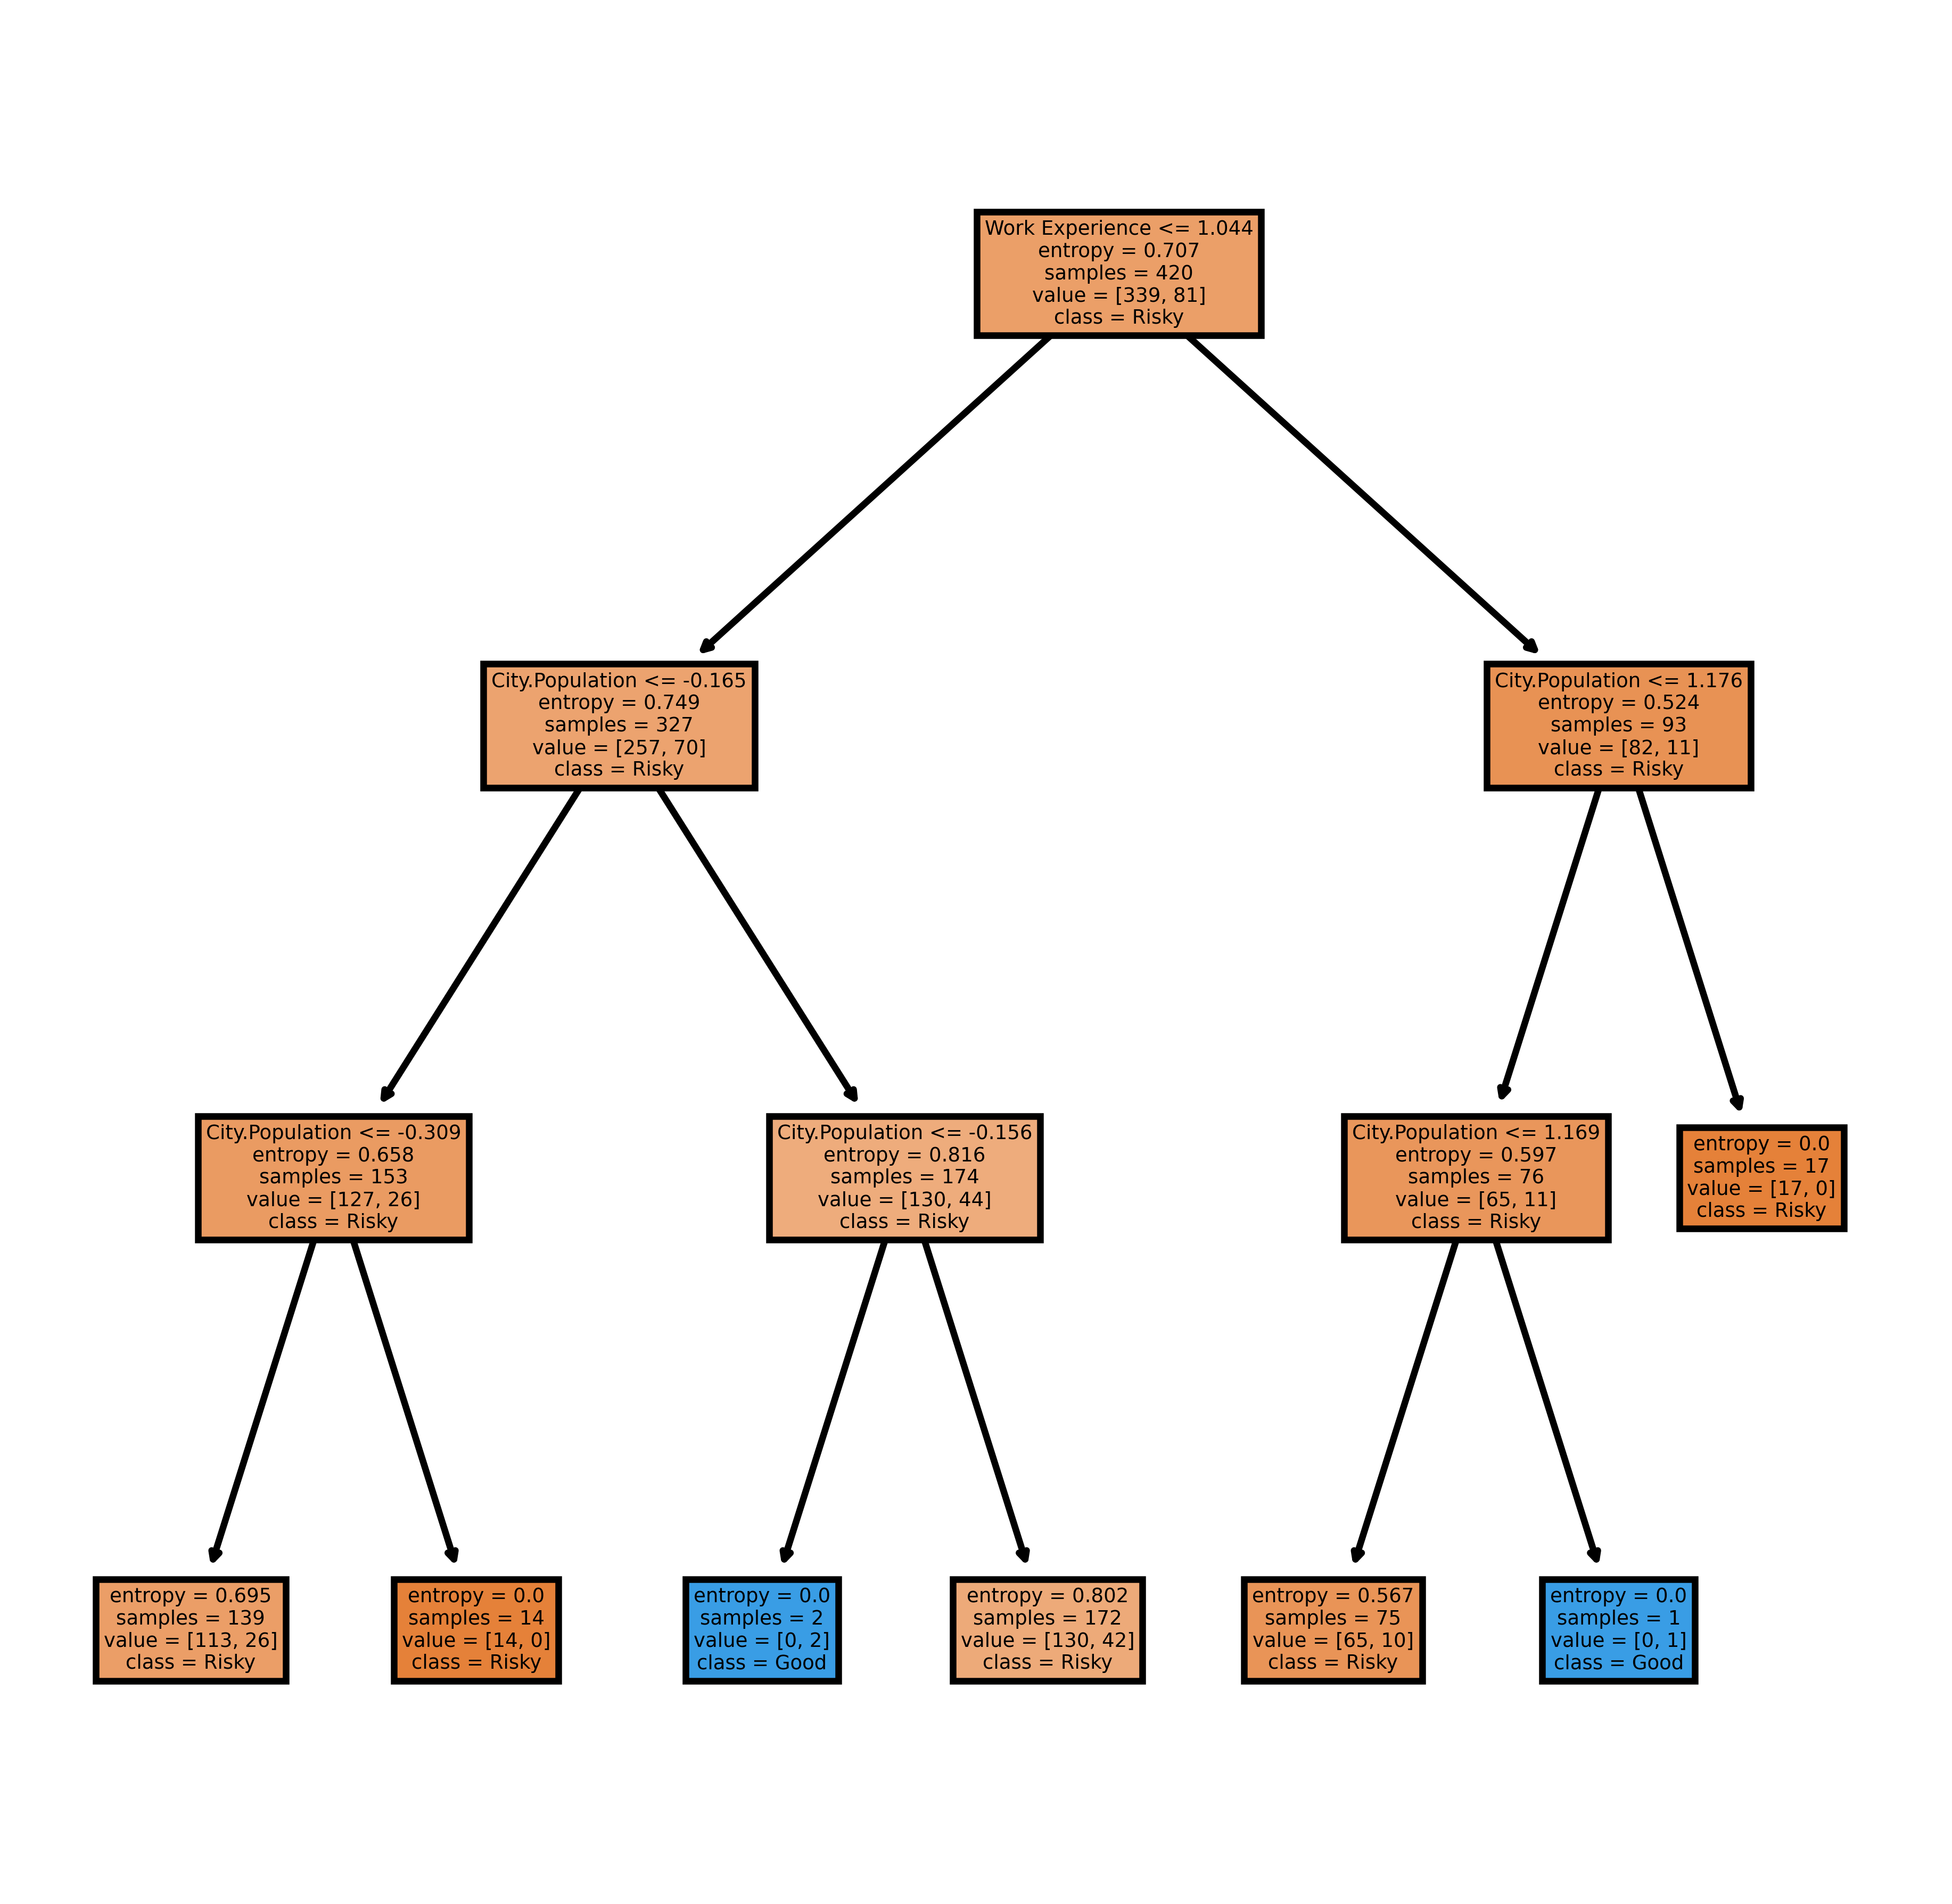

In [23]:
fn=['Undergrad ','Marital.Status','City.Population','Work Experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=900)
tree.plot_tree(model_2,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [21]:
pred_2 = model_2.predict(x_test)
pred_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [22]:
print('Model Accuracy is:',np.mean(pred_2==y_test))

Model Accuracy is: 0.7611111111111111


###   We build the decision tree using entropy criterian and on pruning the accuracy increased to 76% for max_depth = 3 and we can better understand the model 

###   Building Decision Tree Classifier Using Gini 

####  Max_Depth = 2

In [24]:
model_gini = DecisionTreeClassifier(criterion= 'gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

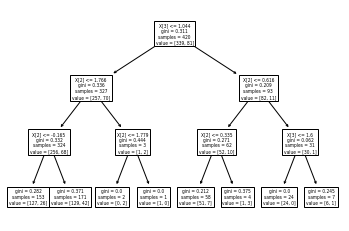

In [25]:
tree.plot_tree(model_gini);

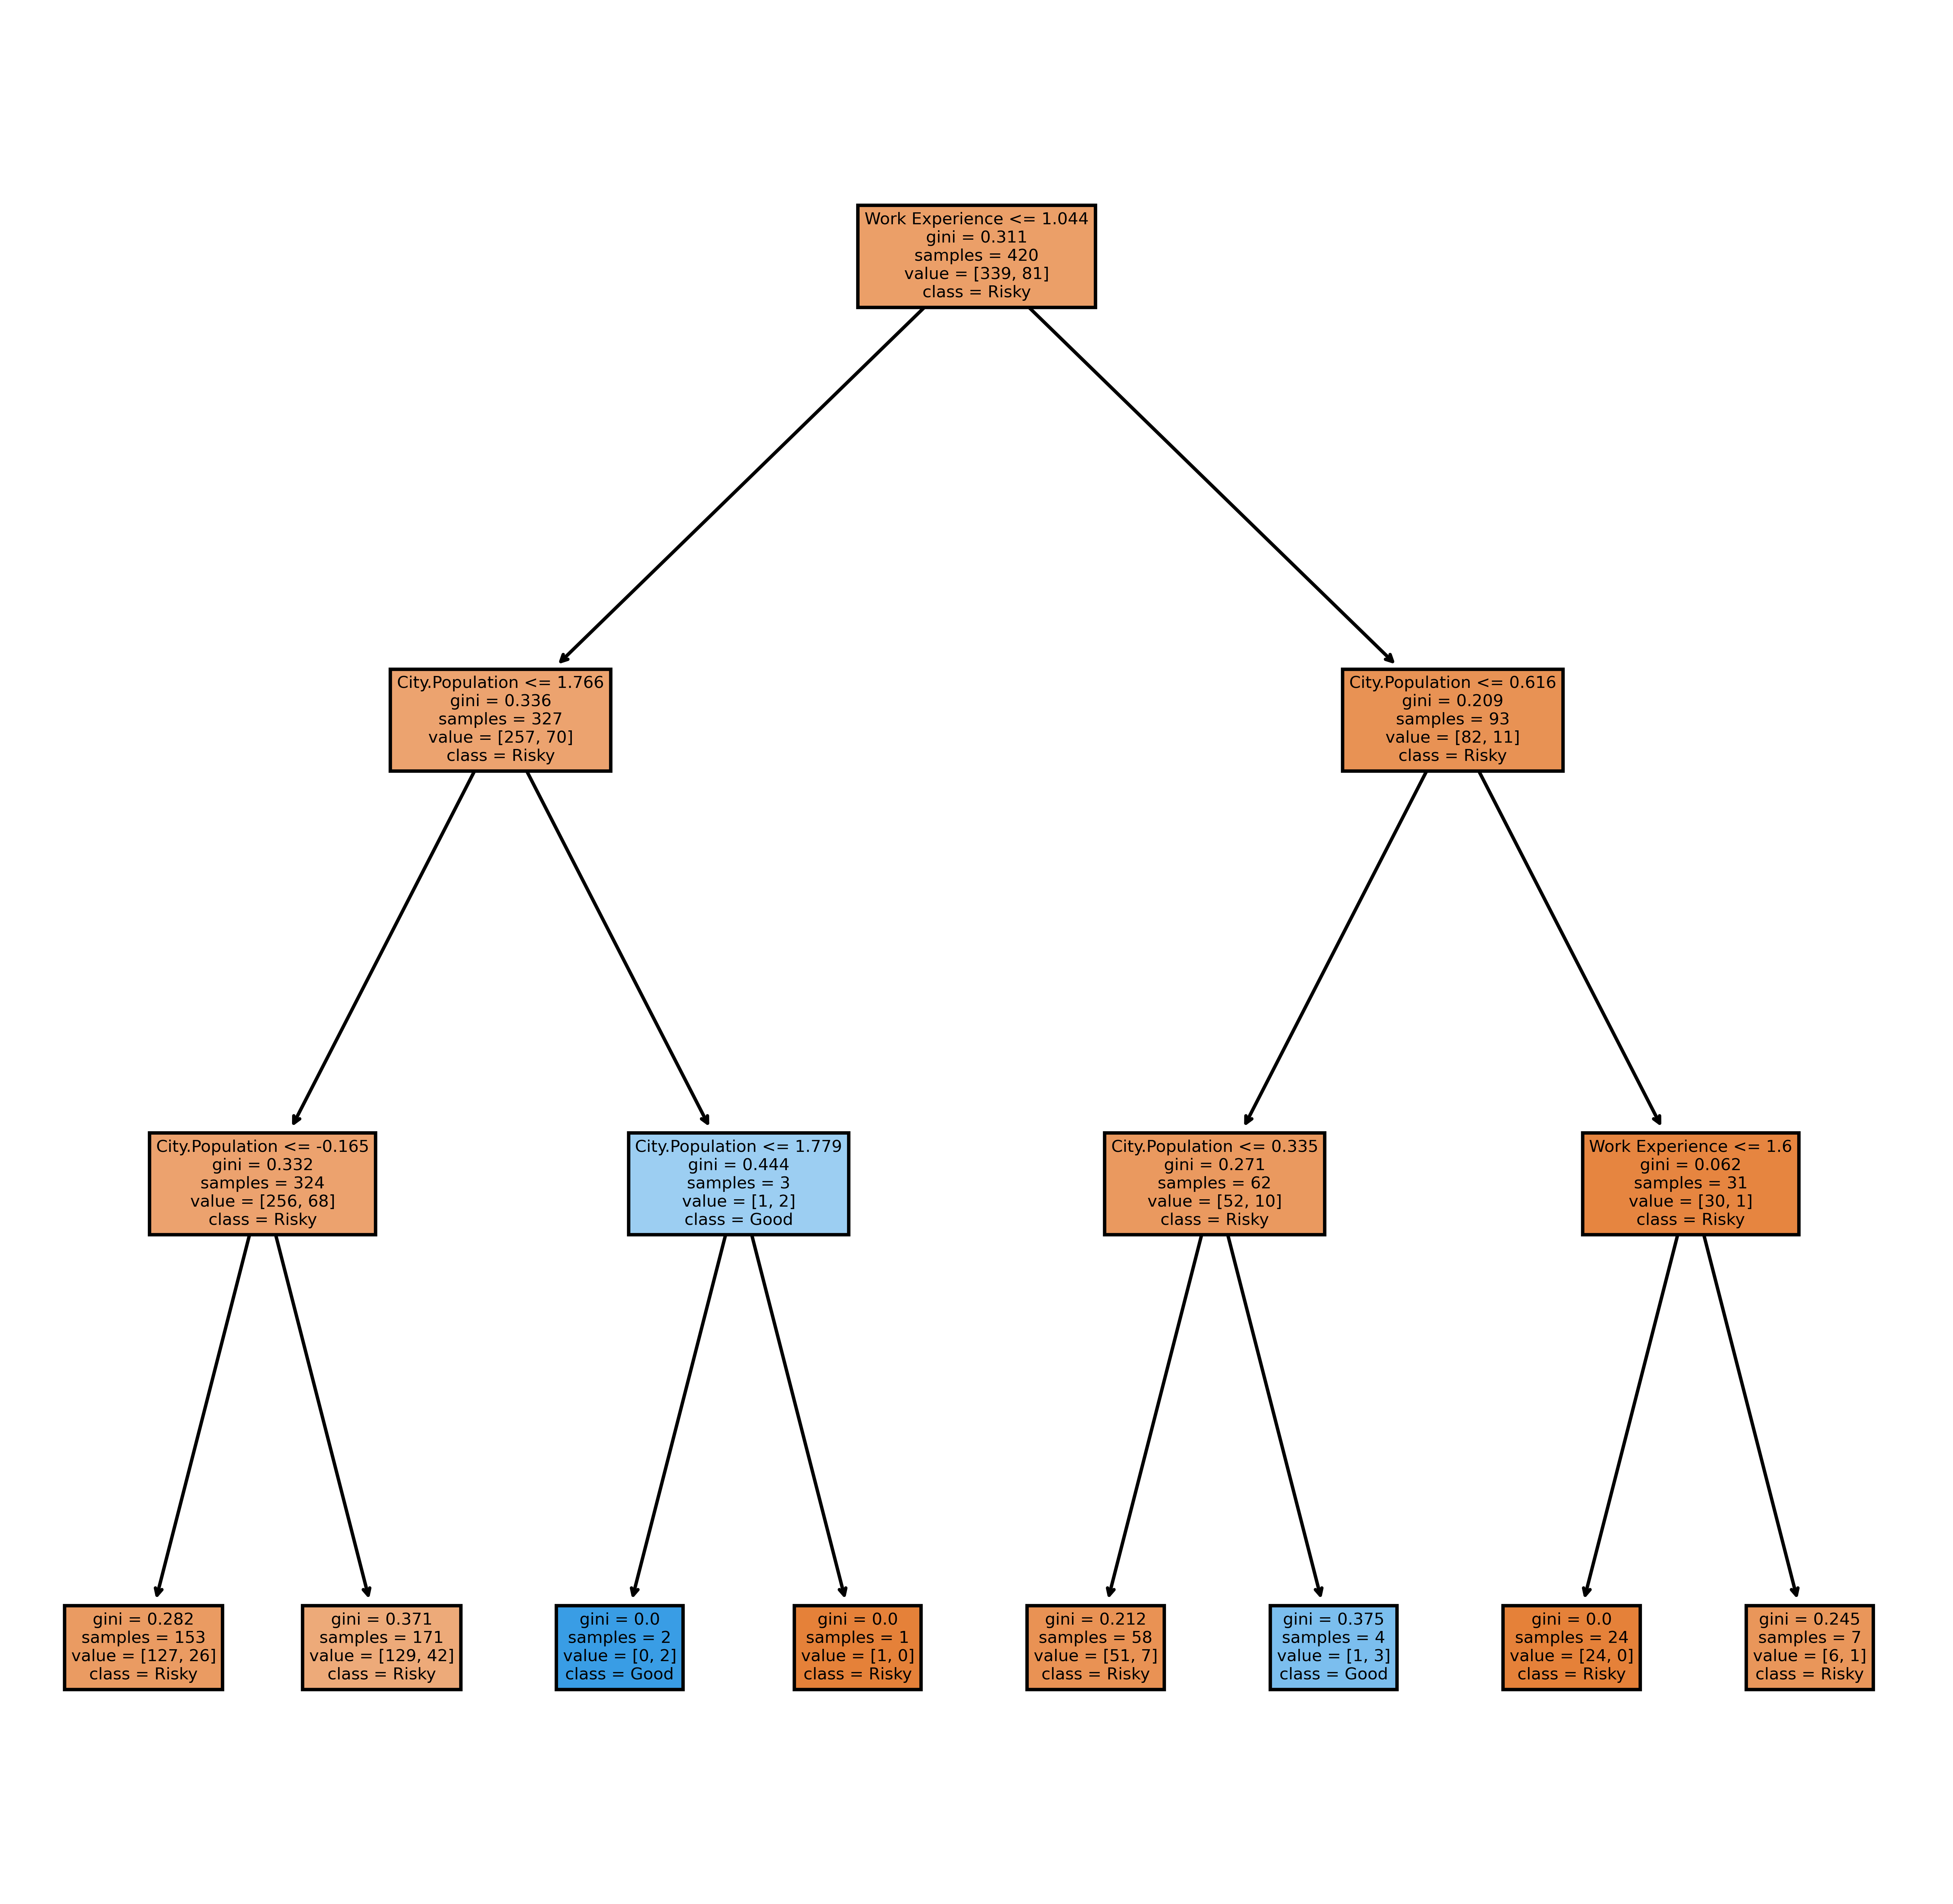

In [26]:
fn=['Undergrad ','Marital.Status','City.Population','Work Experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=700)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [27]:
pred_gini = model_gini.predict(x_test)
pred_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [28]:
pd.Series(pred_gini).value_counts()

0    177
1      3
dtype: int64

In [29]:
print('Model Accuracy is:',np.mean(pred_gini==y_test))

Model Accuracy is: 0.7555555555555555


###  We build the decision tree using gini criterian and got an accuarcy of 76% and can understand the model better 